Predict is user is going to click on cart adds or not ?

1. Data Exploration 
Correlation - traffic channel & entry page, due to marketting campaigns traffic was entering from paid search via products Office page   
Data visualization - bar charts, 

2. feature engineering - collected features for 
    New visitors, Return visitors
    Traffic channel - Direct, O&O, Organic search
    Entry Page
    Time Spent on Page
    Link clicks on the page
    
    i. impute missing values - 
        a. time spent on the page = 0, > 29 mins then discraded as considered another visit
        b. Link clicks on the page similarly for rows where CTR > 100 considered as bot traffic 
    
    ii. Standarization 
    
3. Logistic Regression - 
4. LGBM - light gradient boosting
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
5. XGB - xtended GB
https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
6. Metric selection - unbalanced data, also more concerned abt absolute selection so selected F1 score  - 70
 https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428
7. Parameter tuning
8. XGB - results shown by Plot tree
https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/


In [47]:
import pandas as pd
import seaborn as sns

In [48]:
df = pd.read_csv('Data/buy_try_data.csv')
df.head()

,MC1ID,Paid Orders Exists,Free Orders Exists,Visits,New Visitors Exists,Return Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,...,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab,Link Clicks on AddToCartButton,Link Clicks on Try Link,RPV
0,77d20fbd617eba42a48d01822684da62,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,333.0,7.5,86.0,0,0,0,0,0,0,99.99
1,dd23dfffa72e41de888cb7df3990b1d2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,370.0,NaN,31.0,0,0,0,0,0,0,9.99
2,23676d54473c4bf5b8844b02cc5971a5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1440.0,72.0,56.0,0,0,0,0,0,0,55.00
3,efe1dd5a57f94ec585bca628a00dc1e5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,242.0,NaN,42.0,0,0,0,0,0,0,149.99
4,6f018a3ff7e7486abb340d09d37385a9,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,1.0,0,0,0,0,0,0,6.99


In [49]:
df.groupby('Enter from O365 Web').size()

Enter from O365 Web
0.0    353
1.0    162
2.0      1
dtype: int64

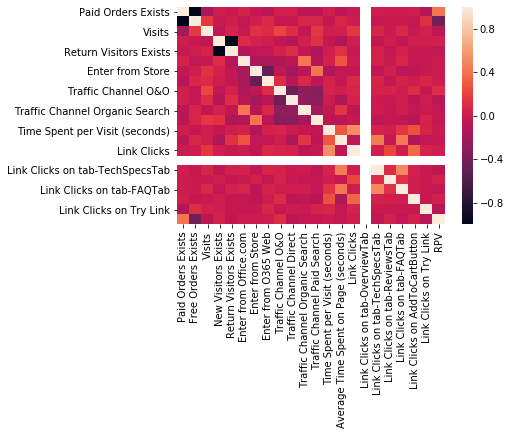

In [50]:
sns.heatmap(df.corr())

In [51]:
df.drop(['MC1ID','Free Orders Exists', 'Return Visitors Exists','Link Clicks on AddToCartButton','Link Clicks on Try Link','RPV'],axis=1,  inplace=True)

In [52]:
df.head()

,Paid Orders Exists,Visits,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab
0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,333.0,7.5,86.0,0,0,0,0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,370.0,NaN,31.0,0,0,0,0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1440.0,72.0,56.0,0,0,0,0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,242.0,NaN,42.0,0,0,0,0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0,0,0,0,0


In [53]:
df.fillna(value=0, inplace=True)

In [54]:
df.shape

(518, 17)

In [55]:
df['Paid Orders Exists'].value_counts()/len(df)

1.0    0.781853
0.0    0.218147
Name: Paid Orders Exists, dtype: float64

In [56]:
## 1 - clicked on paid product, 0 - clicked on try product

In [57]:
df.describe()

,Paid Orders Exists,Visits,New Visitors Exists,Enter from Office.com,Enter from Store,Enter from O365 Web,Traffic Channel O&O,Traffic Channel Direct,Traffic Channel Organic Search,Traffic Channel Paid Search,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks,Link Clicks on tab-OverviewTab,Link Clicks on tab-TechSpecsTab,Link Clicks on tab-ReviewsTab,Link Clicks on tab-FAQTab
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.0,518.000000,518.000000,518.000000
mean,0.781853,1.019305,0.606178,0.046332,0.361004,0.316602,0.353282,0.308880,0.135135,0.196911,584.095560,40.181072,33.206564,0.0,0.013514,0.009653,0.009653
std,0.413387,0.231916,0.489069,0.210406,0.492678,0.469736,0.494358,0.470769,0.342198,0.412369,791.384307,191.687016,29.190129,0.0,0.115571,0.145545,0.097866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,13.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.000000,0.000000,25.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,813.000000,10.916667,44.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,5.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,6263.000000,2615.000000,254.000000,0.0,1.000000,3.000000,1.000000


In [58]:
df.columns

Index(['Paid Orders Exists', 'Visits', 'New Visitors Exists',
       'Enter from Office.com', 'Enter from Store', 'Enter from O365 Web',
       'Traffic Channel O&O', 'Traffic Channel Direct',
       'Traffic Channel Organic Search', 'Traffic Channel Paid Search',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks',
       'Link Clicks on tab-OverviewTab', 'Link Clicks on tab-TechSpecsTab',
       'Link Clicks on tab-ReviewsTab', 'Link Clicks on tab-FAQTab'],
      dtype='object')

In [59]:
(df.groupby(['Enter from Office.com']).mean()['Paid Orders Exists']/len(df))*100

Enter from Office.com
0.0    0.150063
1.0    0.168919
Name: Paid Orders Exists, dtype: float64

In [64]:
feat_cols = ['New Visitors Exists',
       'Enter from Office.com', 'Enter from Store', 'Enter from O365 Web',
       'Traffic Channel O&O', 'Traffic Channel Direct',
       'Traffic Channel Organic Search', 'Traffic Channel Paid Search',
       'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks',
       'Link Clicks on tab-OverviewTab', 'Link Clicks on tab-TechSpecsTab',
       'Link Clicks on tab-ReviewsTab', 'Link Clicks on tab-FAQTab']

In [65]:
for c in feat_cols:
    print ((df.groupby(c).sum()['Paid Orders Exists']/len(df))*100)

New Visitors Exists
0.0    30.308880
1.0    47.876448
Name: Paid Orders Exists, dtype: float64
Enter from Office.com
0.0    74.131274
1.0     4.054054
Name: Paid Orders Exists, dtype: float64
Enter from Store
0.0    50.386100
1.0    27.799228
3.0     0.000000
Name: Paid Orders Exists, dtype: float64
Enter from O365 Web
0.0    55.019305
1.0    23.166023
2.0     0.000000
Name: Paid Orders Exists, dtype: float64
Traffic Channel O&O
0.0    49.806950
1.0    28.378378
2.0     0.000000
3.0     0.000000
Name: Paid Orders Exists, dtype: float64
Traffic Channel Direct
0.0    53.474903
1.0    24.517375
2.0     0.193050
Name: Paid Orders Exists, dtype: float64
Traffic Channel Organic Search
0.0    68.532819
1.0     9.652510
Name: Paid Orders Exists, dtype: float64
Traffic Channel Paid Search
0.0    63.899614
1.0    14.285714
3.0     0.000000
Name: Paid Orders Exists, dtype: float64
Time Spent per Visit (seconds)
0.0       2.316602
1.0       0.965251
3.0       0.193050
4.0       0.193050
5.0       

In [66]:
train_X = df.loc[:,df.columns!='Paid Orders Exists' ]
train_Y = df['Paid Orders Exists']

In [67]:
import lightgbm as lgbm
import numpy as np

In [68]:
msk = np.random.rand(len(train_X))<0.8

In [69]:
lgbm_train = lgbm.Dataset(train_X[msk], train_Y[msk]) 
lgbm_eval = lgbm.Dataset( train_X[~msk], train_Y[~msk], reference=lgbm_train)

# LGBM

In [70]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgbm.train(params,
                lgbm_train,
                num_boost_round=4000,
                valid_sets=lgbm_eval,
                early_stopping_rounds=500)

Start training...
[1]	valid_0's binary_logloss: 0.53694
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.537668
[3]	valid_0's binary_logloss: 0.537175
[4]	valid_0's binary_logloss: 0.537211
[5]	valid_0's binary_logloss: 0.534645
[6]	valid_0's binary_logloss: 0.534535
[7]	valid_0's binary_logloss: 0.53652
[8]	valid_0's binary_logloss: 0.535383
[9]	valid_0's binary_logloss: 0.538437
[10]	valid_0's binary_logloss: 0.537898
[11]	valid_0's binary_logloss: 0.540801
[12]	valid_0's binary_logloss: 0.538648
[13]	valid_0's binary_logloss: 0.536343
[14]	valid_0's binary_logloss: 0.532697
[15]	valid_0's binary_logloss: 0.53087
[16]	valid_0's binary_logloss: 0.533354
[17]	valid_0's binary_logloss: 0.536298
[18]	valid_0's binary_logloss: 0.53631
[19]	valid_0's binary_logloss: 0.535005
[20]	valid_0's binary_logloss: 0.534014
[21]	valid_0's binary_logloss: 0.536402
[22]	valid_0's binary_logloss: 0.536332
[23]	valid_0's binary_logloss: 0.536164
[24]	valid_0

[397]	valid_0's binary_logloss: 0.636996
[398]	valid_0's binary_logloss: 0.640807
[399]	valid_0's binary_logloss: 0.640818
[400]	valid_0's binary_logloss: 0.640379
[401]	valid_0's binary_logloss: 0.63732
[402]	valid_0's binary_logloss: 0.637286
[403]	valid_0's binary_logloss: 0.63655
[404]	valid_0's binary_logloss: 0.63495
[405]	valid_0's binary_logloss: 0.634523
[406]	valid_0's binary_logloss: 0.637615
[407]	valid_0's binary_logloss: 0.64097
[408]	valid_0's binary_logloss: 0.644547
[409]	valid_0's binary_logloss: 0.648694
[410]	valid_0's binary_logloss: 0.654545
[411]	valid_0's binary_logloss: 0.654089
[412]	valid_0's binary_logloss: 0.652529
[413]	valid_0's binary_logloss: 0.6504
[414]	valid_0's binary_logloss: 0.64951
[415]	valid_0's binary_logloss: 0.644788
[416]	valid_0's binary_logloss: 0.644969
[417]	valid_0's binary_logloss: 0.644518
[418]	valid_0's binary_logloss: 0.64415
[419]	valid_0's binary_logloss: 0.643562
[420]	valid_0's binary_logloss: 0.645528
[421]	valid_0's binary_l

# XGBM

In [71]:
train_X.columns

Index(['Visits', 'New Visitors Exists', 'Enter from Office.com',
       'Enter from Store', 'Enter from O365 Web', 'Traffic Channel O&O',
       'Traffic Channel Direct', 'Traffic Channel Organic Search',
       'Traffic Channel Paid Search', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks',
       'Link Clicks on tab-OverviewTab', 'Link Clicks on tab-TechSpecsTab',
       'Link Clicks on tab-ReviewsTab', 'Link Clicks on tab-FAQTab'],
      dtype='object')

In [72]:
df.columns=df.columns.str.replace(" ",'-')
#train_X.columns.str.replace(" ", '-')

In [73]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_tree
from sklearn import tree
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    return gbm
    
features = ['Visits', 'New-Visitors-Exists', 'Enter-from-Office.com',
       'Enter-from-Store', 'Enter-from-O365-Web', 'Traffic-Channel-O&O',
       'Traffic-Channel-Direct', 'Traffic-Channel-Organic-Search',
       'Traffic-Channel-Paid-Search', 'Time-Spent-per-Visit-(seconds)',
       'Average-Time-Spent-on-Page-(seconds)', 'Link-Clicks',
       'Link-Clicks-on-tab-OverviewTab', 'Link-Clicks-on-tab-TechSpecsTab',
       'Link-Clicks-on-tab-ReviewsTab', 'Link-Clicks-on-tab-FAQTab']
gbm=run_default_test(df, train_Y, features, 'Paid-Orders-Exists')



XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[0]	train-logloss:0.650578	eval-logloss:0.660732
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.621732	eval-logloss:0.634364
[2]	train-logloss:0.59439	eval-logloss:0.612157
[3]	train-logloss:0.572278	eval-logloss:0.598896
[4]	train-logloss:0.554711	eval-logloss:0.586424
[5]	train-logloss:0.538998	eval-logloss:0.573325
[6]	train-logloss:0.521015	eval-logloss:0.56141
[7]	train-logloss:0.505871	eval-logloss:0.552981
[8]	train-logloss:0.491972	eval-logloss:0.544242
[9]	train-logloss:0.481853	eval-logloss:0.535216
[10]	train-logloss:0.470543	eval-logloss:0.533121
[11]	train-logloss:0.461331	eval-logloss:0.533552
[12]	train-logloss:0.453582	eval-logloss:0.531022
[13]	train-logloss:0.444502	eval-logloss:0.530358
[14]	train-logloss:0.436656	eval-logloss:0.529014
[15]	train-logloss:0.428491	eval-l

/Users/sulbha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/sulbha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[40]	train-logloss:0.326104	eval-logloss:0.548106
[41]	train-logloss:0.323929	eval-logloss:0.548653
[42]	train-logloss:0.319247	eval-logloss:0.550791
Stopping. Best iteration:
[22]	train-logloss:0.390905	eval-logloss:0.515526



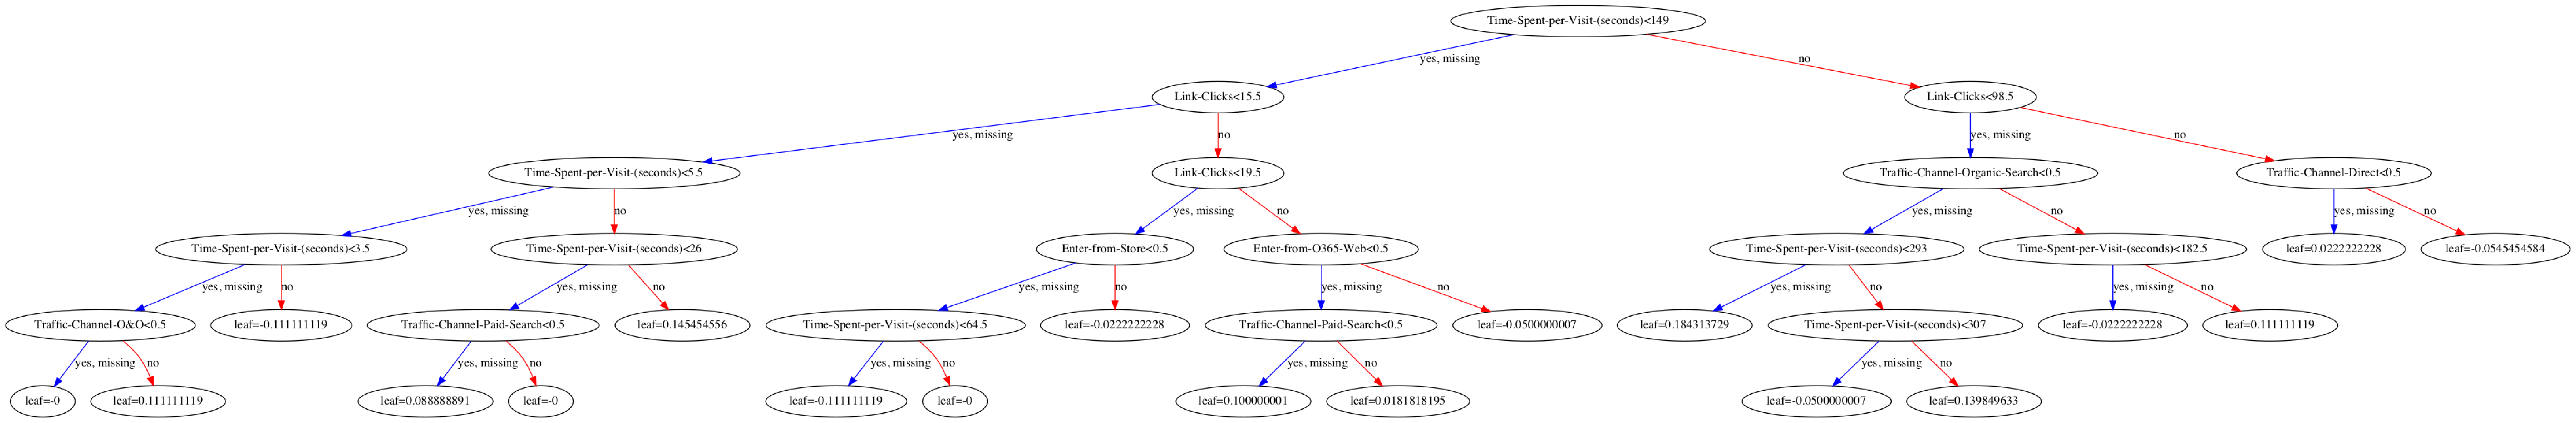

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(20,20))
# plot_tree(gbm)


plot_tree(gbm)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

In [75]:
#y_pred1=pd.DataFrame( y_pred, columns=['pred'])['pred'].apply(lambda x: 0 if x<0.5 else 1)

In [77]:
#print (classification_report(y_valid, y_pred1))

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()

In [82]:
test_size = 0.2

X_train, X_valid = train_test_split(df, test_size=test_size, random_state=0)
y_train = X_train['Paid-Orders-Exists']
y_valid = X_valid['Paid-Orders-Exists']
    
lr.fit(X_train[features], y_train)

/Users/sulbha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred = lr.predict(X_valid[features])

In [84]:
from sklearn.metrics import log_loss,auc,roc_curve,classification_report,confusion_matrix

In [85]:
log_loss(y_valid, y_pred)

7.638544698355576

In [ ]:
y_pred

In [ ]:
confusion_matrix(y_valid, y_pred)

In [ ]:
print (classification_report(y_valid, y_pred))

In [ ]:
fpr, tpr, th = roc_curve(y_valid, y_pred)

In [ ]:
auc(fpr,tpr)

In [ ]:
fpr

In [ ]:
tpr

## which metric to choose 
https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428

# visualization of tree

In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(gbm, out_file=None, feature_names=X.columns))